In [47]:
import matplotlib.pyplot as plt
import numpy as np
from proj1_helpers import load_csv_data, create_csv_submission, predict_labels
from helpers import get_cross_validation_data, compute_loss_rlr, \
 mse_loss, sigmoid, build_poly, split_data, mae_loss, compute_gradient_lr, compute_loss_lr, remove_outliers, data_norm
from implementations import reg_logistic_regression, ridge_regression
import seaborn as sns
sns.set_style("whitegrid")
sns.set()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
y, X, ids = load_csv_data("./data/train.csv") 
kind = X[:,-8]
y[y==-1]=0

In [26]:
col_names = open("./data/train.csv", 'r', encoding='utf-8').read().strip().split('\n')[0].split(',')[2:]
col_names

['DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt']

In [27]:
len(col_names)

30

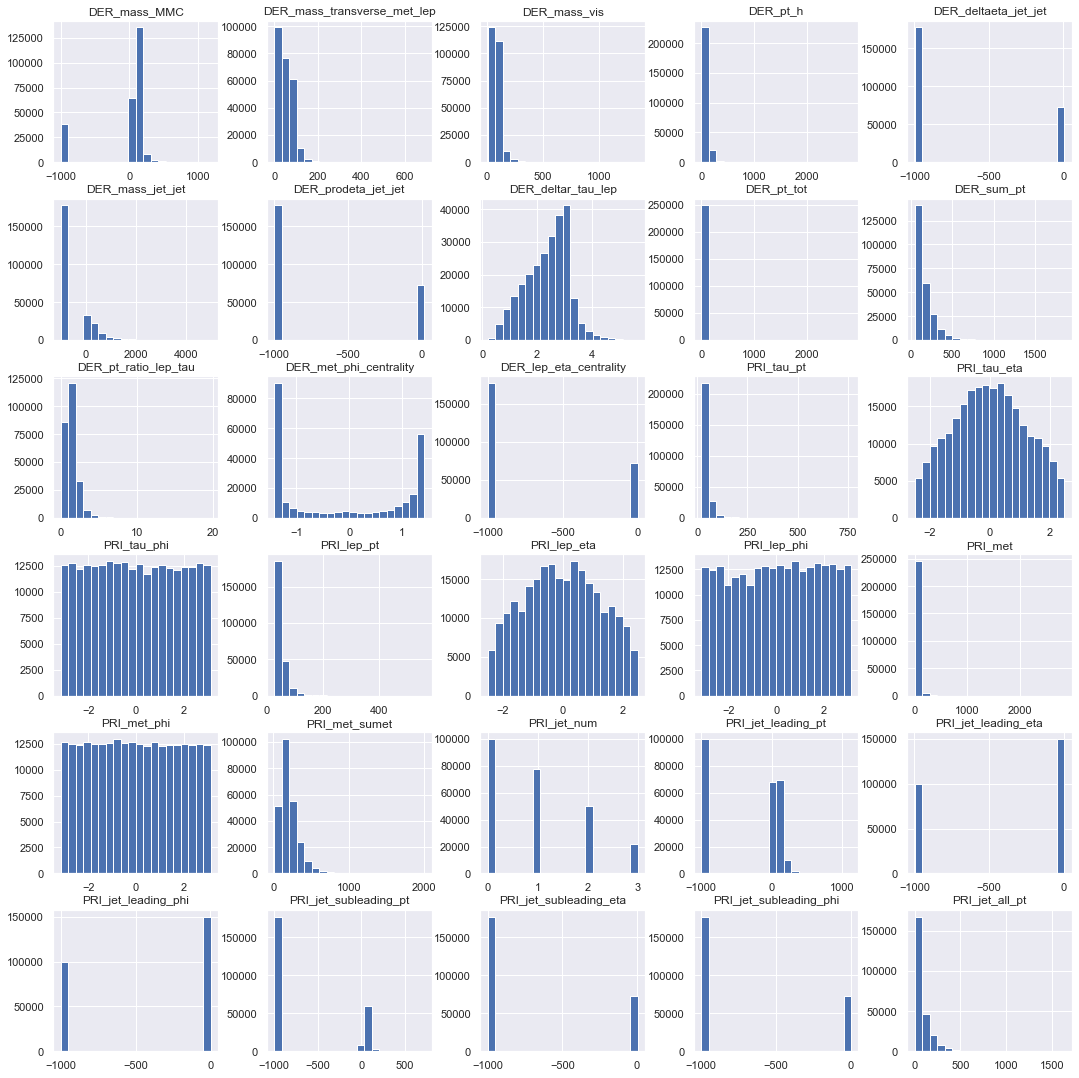

In [33]:
fig, ax = plt.subplots(6,5, sharex=False)
fig.set_size_inches(15,15)
fig.tight_layout()
ax = ax.flatten()
for i in range(0, X.shape[1]):
    plt.subplot(6,5,i+1)
    plt.hist(X[:,i], bins = 20)
    plt.title(col_names[i])
fig.savefig("beforeprocess.jpg")
plt.show()

In [49]:
#get index set of different PRI_ject_num(0, 1, 2&3)
zero_set = np.where(kind == 0)
one_set = np.where(kind == 1)
two_three_set = np.where((kind == 2)|(kind == 3))

#delete the columns that are meaningless or uncomputable based on specific PRI_ject_num
#collect data sets(specific row groups) according to different PRI_ject_num
zero_delete_col = [4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29] 
one_delete_col = [4, 5, 6, 12, 22, 26, 27, 28]

X_zero = np.delete(X, zero_delete_col, axis = 1)[zero_set,:].squeeze()
y_zero = y[zero_set]
X_one = np.delete(X, one_delete_col, axis = 1)[one_set,:].squeeze()
y_one = y[one_set]
X_two_three = X[two_three_set,:].squeeze()
y_two_three = y[two_three_set]

In [50]:
# Remove outliers and normalize data
X_zero = remove_outliers(X_zero)
X_zero = data_norm(X_zero)
X_one = remove_outliers(X_one)
X_one = data_norm(X_one)
X_two_three = remove_outliers(X_two_three)
X_two_three = data_norm(X_two_three)

In [52]:
print(X_zero.shape)
print(X_one.shape)
print(X_two_three.shape)

(67130, 18)
(54935, 22)
(44912, 30)


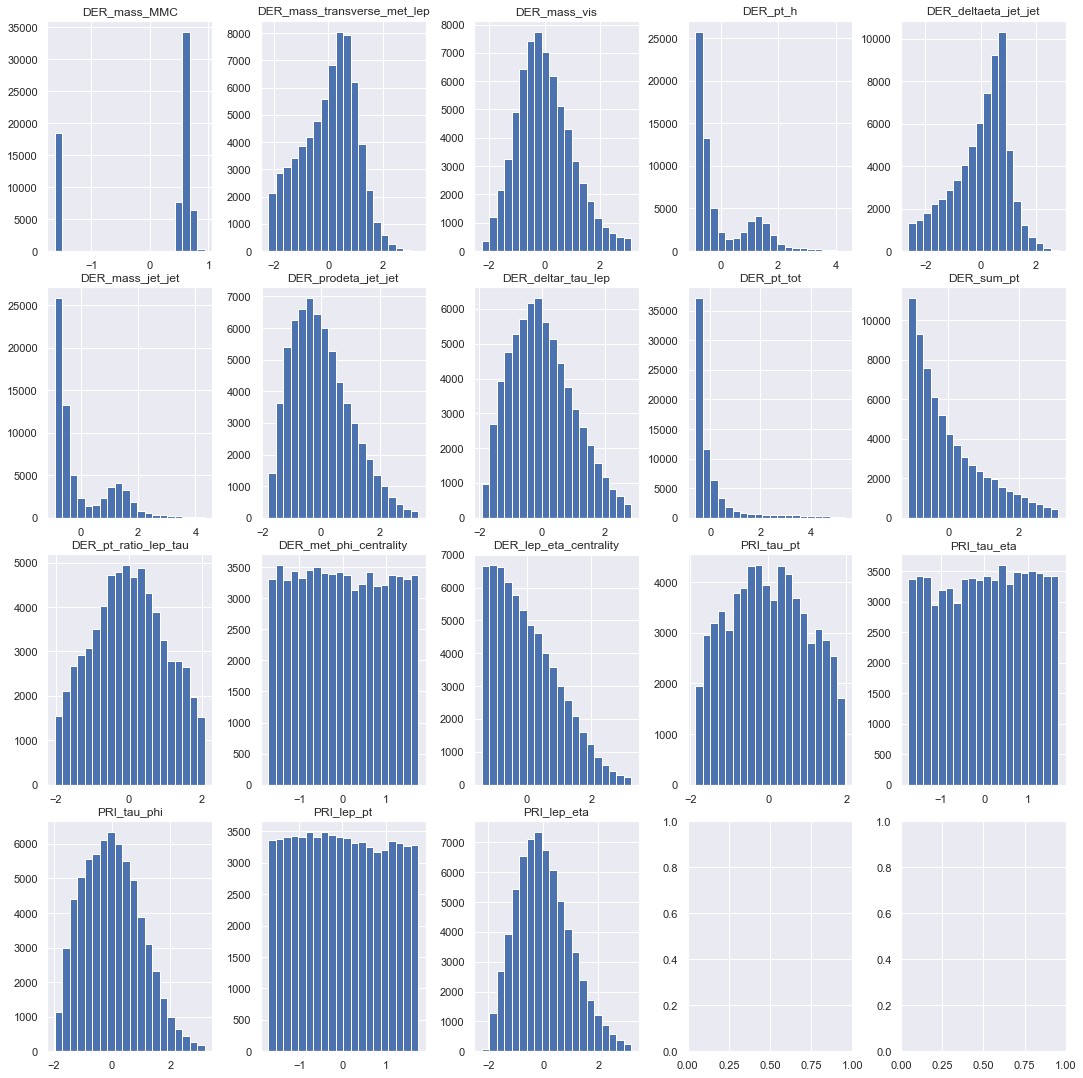

In [66]:

row_num = 4
col_num = 5
fig, axes = plt.subplots(row_num, col_num, sharex=False)
fig.set_size_inches(15,15)
fig.tight_layout()
for i in range(0, X_zero.shape[1]):
    axes[i//col_num, i%col_num].hist(X_zero[:,i], bins = 20)
    axes[i//col_num, i%col_num].set_title(col_names[i])
fig.savefig("afterprocess_zero.jpg")
plt.show()

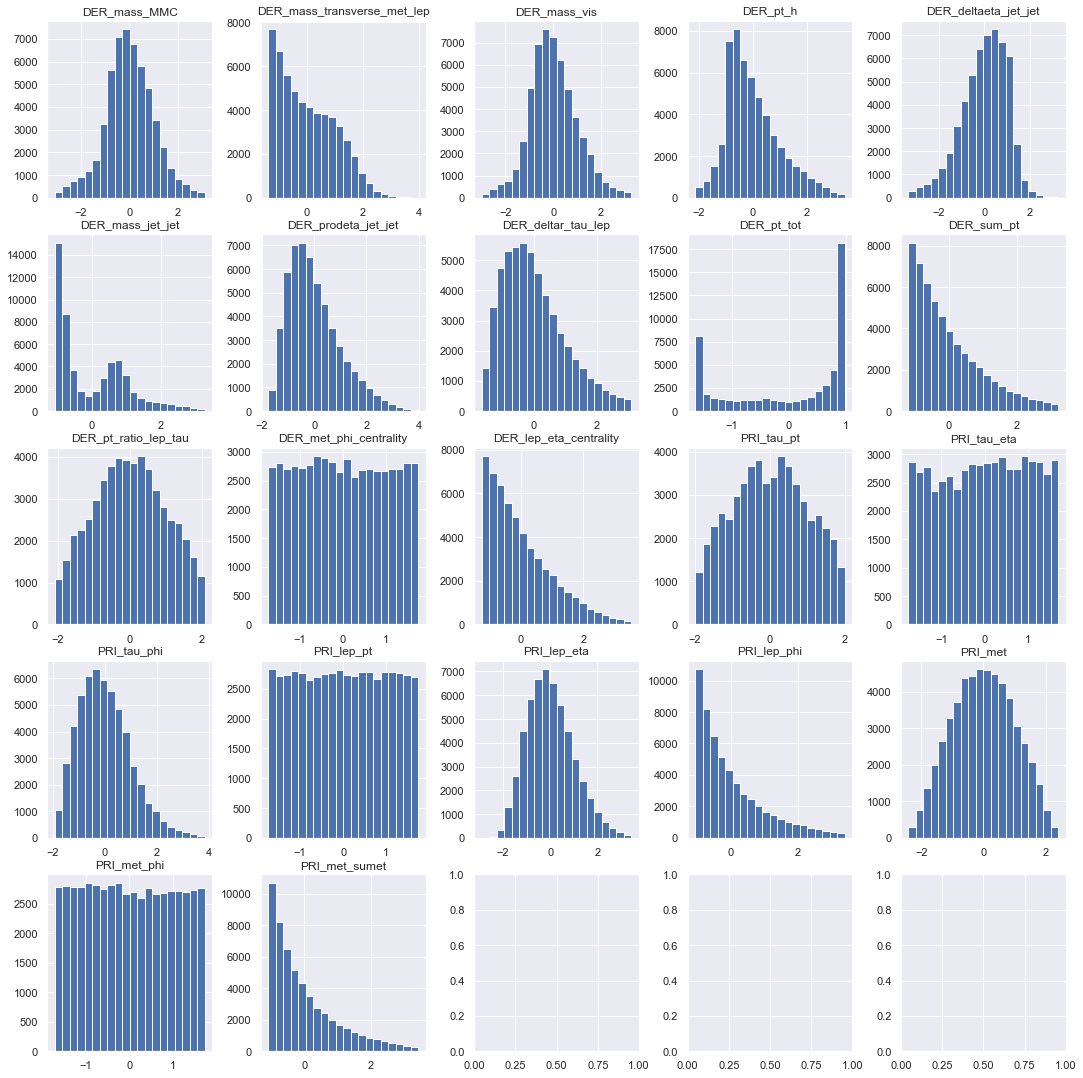

In [67]:
row_num = 5
col_num = 5
fig, axes = plt.subplots(row_num, col_num, sharex=False)
fig.set_size_inches(15,15)
fig.tight_layout()
for i in range(0, X_one.shape[1]):
    axes[i//col_num, i%col_num].hist(X_one[:,i], bins = 20)
    axes[i//col_num, i%col_num].set_title(col_names[i])
fig.savefig("afterprocess_one.jpg")
plt.show()

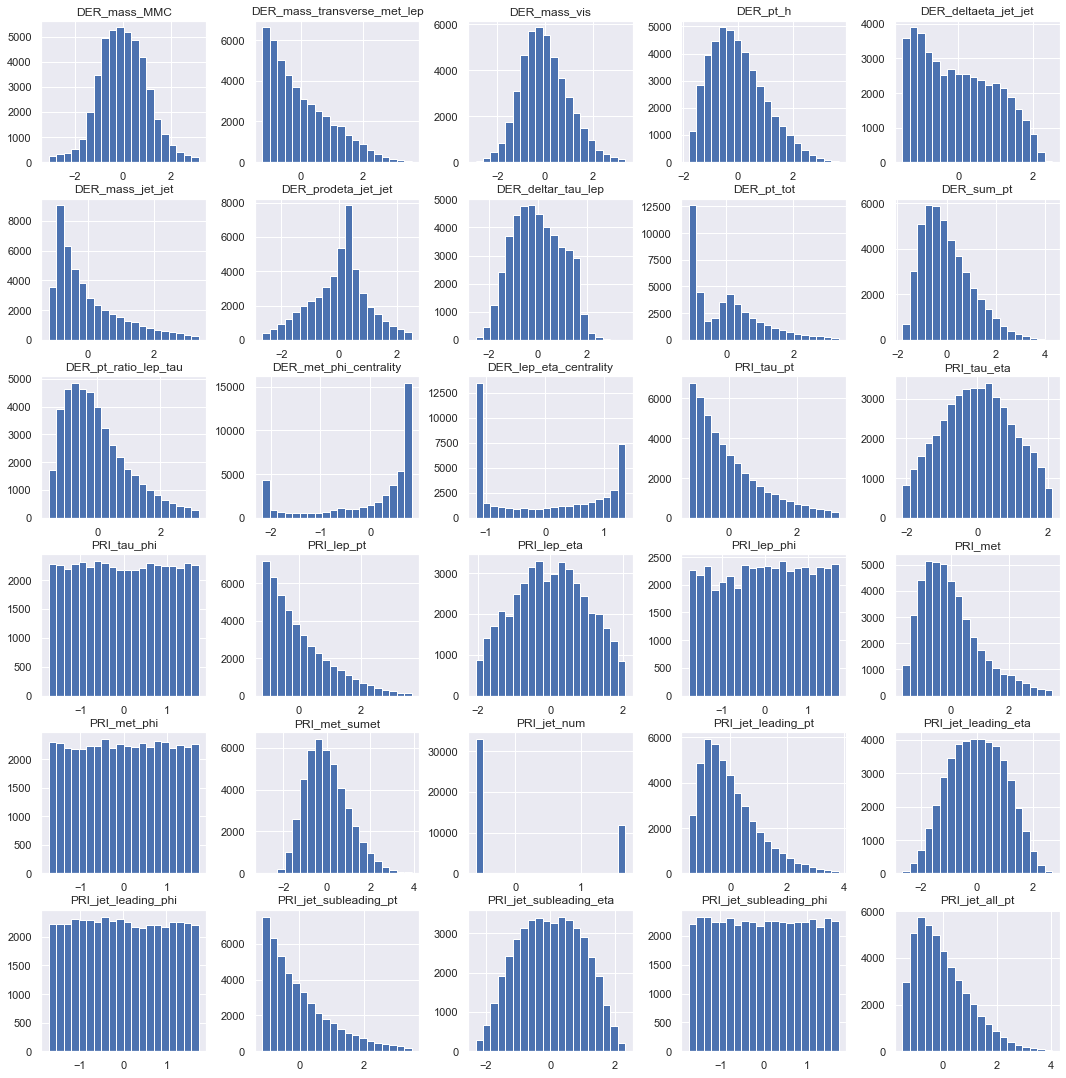

In [69]:
row_num = 6
col_num = 5
fig, axes = plt.subplots(row_num, col_num, sharex=False)
fig.set_size_inches(15,15)
fig.tight_layout()
for i in range(0, X_two_three.shape[1]):
    axes[i//col_num, i%col_num].hist(X_two_three[:,i], bins = 20)
    axes[i//col_num, i%col_num].set_title(col_names[i])
fig.savefig("afterprocess_two_three.jpg")
plt.show()